In [275]:
import pandas as pd
import requests
import numpy as np
from multiprocessing import Pool
  

In [259]:
url1 = 'http://ws.audioscrobbler.com/2.0/?method=chart.gettoptracks&page='
url2 ='&api_key=26773717262125fd849faafc400a0047&format=json'

L=[]
for i in range(1,50): 
    doc= requests.get(url1+str(i)+url2).json()
    title = [elmt['name'] for elmt in doc['tracks']['track']]
    lis = [elmt['listeners'] for elmt in doc['tracks']['track']]
    name = [elmt['artist']['name'] for elmt in doc['tracks']['track']]
    L.append(pd.DataFrame({'Name':name,'titre': title,'Listeners':lis}))


In [260]:
pd.concat(L).to_csv('bla.csv')

In [288]:
bla = pd.read_csv('bla_modif.csv')
titres = pd.read_csv('Titre-artiste-annee_2010-2017.csv')

In [289]:
res = bla.merge(titres, on=('Artiste','Titre'))

In [292]:
res.columns

Index(['Artiste', 'Titre', 'Listeners', 'Annee'], dtype='object')

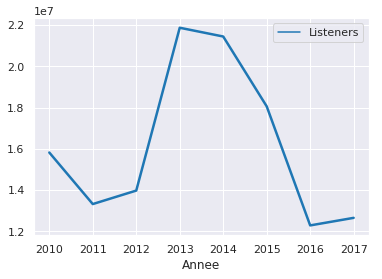

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
res["Annee"]=res["Annee"].astype('int')
res['Listeners']=res['Listeners'].astype('int')
tips = res[['Annee','Listeners']].groupby('Annee').sum()
sns.lineplot(data=tips, palette="tab10", linewidth=2.5)


In [335]:
print(tips)

       Listeners
Annee           
2010    15821363
2011    13323954
2012    13977491
2013    21866443
2014    21441433
2015    18057634
2016    12289290
2017    12655790


       Listeners
Annee           
2010    15821363
2011    13323954
2012    13977491
2013    21866443
2014    21441433
2015    18057634
2016    12289290
2017    12655790


([<matplotlib.axis.XTick at 0x7fce455e3710>,
 <a list of 8 Text xticklabel objects>)

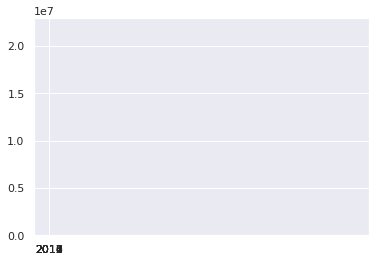

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt
res["Annee"]=res["Annee"].astype('int')
res['Listeners']=res['Listeners'].astype('int')
tips = res[['Annee','Listeners']].groupby('Annee').sum()
print(tips)

plt.hist(tips)

plt.figure(1, figsize=(20, 5))

y_pos = np.arange(len(tips))
plt.bar(y_pos, tips['Listeners'])
Genres = range(2010,2018)
plt.xticks(y_pos, Genres)

In [319]:
tips

,Listeners
Annee,
2010,15821363
2011,13323954
2012,13977491
2013,21866443
2014,21441433
2015,18057634
2016,12289290
2017,12655790
